<a href="https://colab.research.google.com/github/p-anagan/6220project/blob/main/Water_quality_6220_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [3]:

import numpy as np
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

1.3.5


## **Upload File**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/p-anagan/6220project/main/Waterquality%20(2).csv')
df.head(n=25)

,DO,FC,pH,BOD,T,T-PO4,N,TU,TS,Q,S,class
0,6.3,9,8.30,9,13,0.03,0.04,7,87,4.39,1,0
1,4.3,4,8.30,8,15,0.05,0.21,18,148,7.14,1,0
2,5.3,19,8.20,14,16,0.04,1.35,65,321,10.52,1,0
3,5.4,14,8.20,13,17,0.07,1.48,110,459,10.27,1,0
4,5.1,78,8.20,19,18,0.09,4.52,112,448,10.31,1,0
5,4.9,110,8.30,41,17,0.09,3.77,152,473,1.32,1,0
6,4.9,99,8.10,49,18,0.10,3.25,210,634,0.53,1,0
7,4.8,67,8.20,45,18,0.09,3.90,397,745,0.18,2,0
8,4.7,5,8.61,10,16,0.01,0.30,7,280,3.32,2,0
9,4.5,8,8.71,11,19,0.08,1.30,57,390,4.43,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DO      32 non-null     float64
 1   FC      32 non-null     int64  
 2   pH      32 non-null     float64
 3   BOD     32 non-null     int64  
 4   T       32 non-null     int64  
 5   T-PO4   32 non-null     float64
 6   N       32 non-null     float64
 7   TU      32 non-null     int64  
 8   TS      32 non-null     int64  
 9   Q       32 non-null     float64
 10  S       32 non-null     int64  
 11  class   32 non-null     int64  
dtypes: float64(5), int64(7)
memory usage: 3.1 KB


### **Classes**

In [6]:
y = df['class']
print(y)
target = df['class'].to_numpy()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: class, dtype: int64


### **Features**

Data Matrix

In [7]:
X = df.iloc[:,0:7]
X.head(10)

,DO,FC,pH,BOD,T,T-PO4,N
0,6.3,9,8.30,9,13,0.03,0.04
1,4.3,4,8.30,8,15,0.05,0.21
2,5.3,19,8.20,14,16,0.04,1.35
3,5.4,14,8.20,13,17,0.07,1.48
4,5.1,78,8.20,19,18,0.09,4.52
5,4.9,110,8.30,41,17,0.09,3.77
6,4.9,99,8.10,49,18,0.10,3.25
7,4.8,67,8.20,45,18,0.09,3.90
8,4.7,5,8.61,10,16,0.01,0.30
9,4.5,8,8.71,11,19,0.08,1.30


In [8]:
X.describe().transpose()
print(y)    

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: class, dtype: int64


In [9]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DO,32.0,-1.838807e-16,1.016001,-1.816106,-0.747555,-0.230514,0.872507,2.320221
FC,32.0,-1.192622e-17,1.016001,-0.817241,-0.711251,-0.493692,0.304025,2.931469
pH,32.0,-1.734723e-17,1.016001,-1.779528,-0.467351,-0.341526,0.557226,2.606380
BOD,32.0,1.734723e-17,1.016001,-1.019724,-0.733485,-0.383639,0.316055,2.097092
T,32.0,1.040834e-16,1.016001,-1.773735,-0.760172,0.077119,0.341527,1.751701
T-PO4,32.0,-2.428613e-16,1.016001,-1.863364,-0.852726,0.326352,0.831671,1.168551
N,32.0,-3.469447e-17,1.016001,-1.482851,-0.842140,-0.124234,0.898588,1.975446


Notice that the data is now standardizd.

**Observations and variables**

In [11]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
['DO', 'FC', 'pH', 'BOD', 'T', 'T-PO4', 'N']


## **Data Visualisation**

### Class Distribution

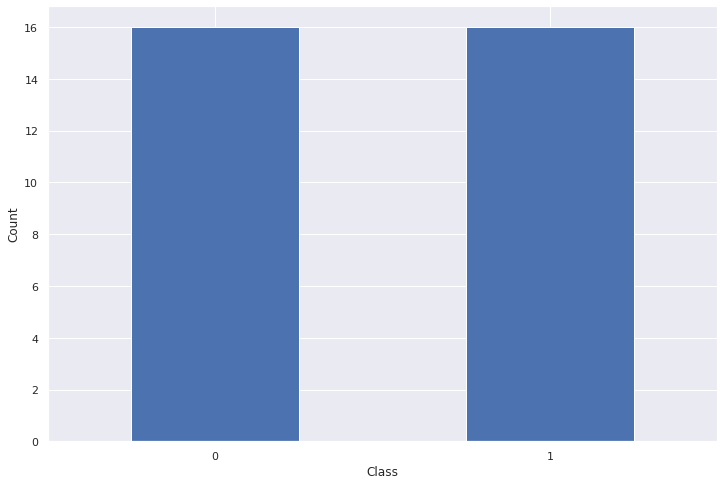

In [12]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Box & Whisker Plots

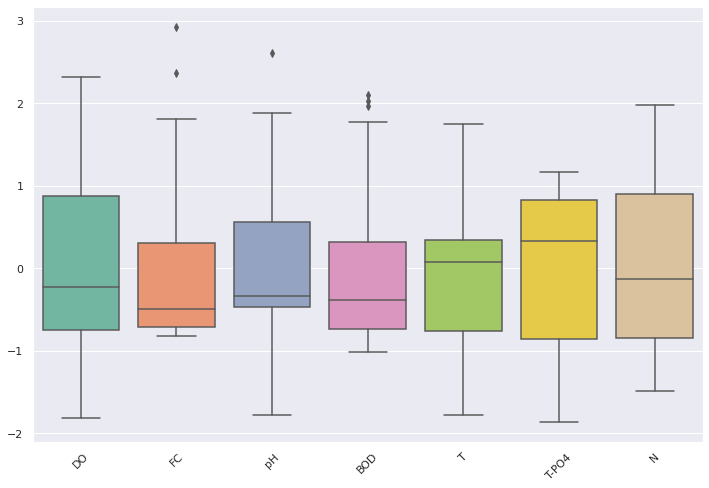

In [13]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

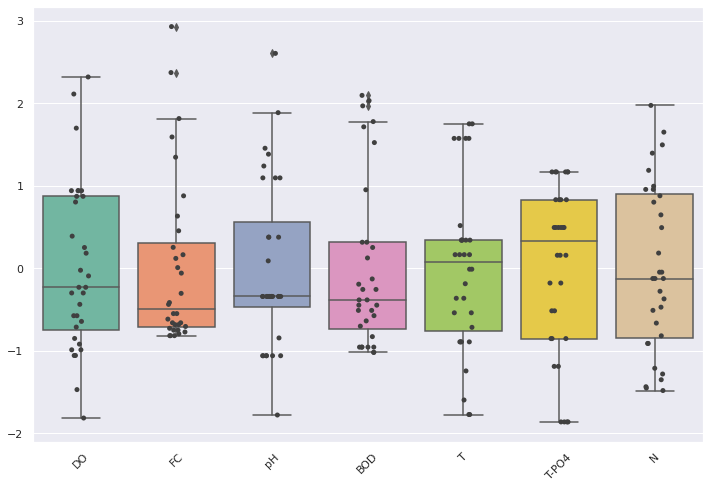

In [14]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


In [15]:
df.describe()

,DO,FC,pH,BOD,T,T-PO4,N
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01
mean,-1.838807e-16,-1.192622e-17,-1.734723e-17,1.734723e-17,1.040834e-16,-2.428613e-16,-3.469447e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00
min,-1.816106e+00,-8.172410e-01,-1.779528e+00,-1.019724e+00,-1.773735e+00,-1.863364e+00,-1.482851e+00
25%,-7.475550e-01,-7.112507e-01,-4.673508e-01,-7.334854e-01,-7.601719e-01,-8.527261e-01,-8.421398e-01
50%,-2.305141e-01,-4.936917e-01,-3.415256e-01,-3.836387e-01,7.711889e-02,3.263520e-01,-1.242343e-01
75%,8.725065e-01,3.040248e-01,5.572260e-01,3.160547e-01,3.415265e-01,8.316711e-01,8.985880e-01
max,2.320221e+00,2.931469e+00,2.606380e+00,2.097092e+00,1.751701e+00,1.168551e+00,1.975446e+00


### Pair Plot

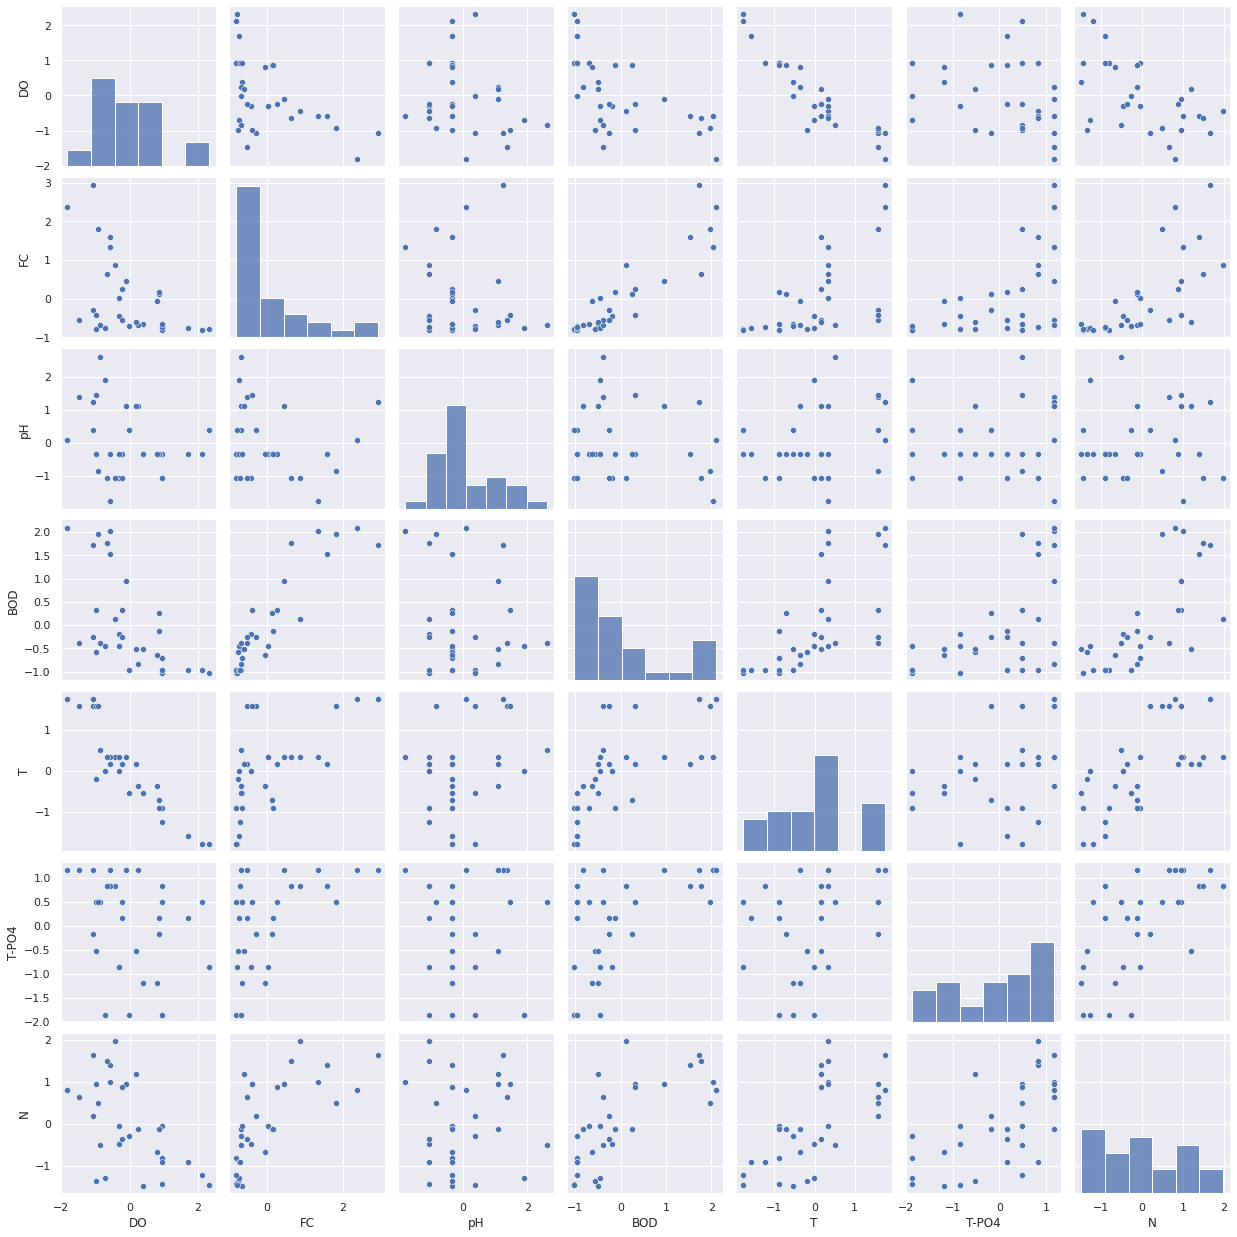

In [16]:
sns.pairplot(df)

## **Covariance**

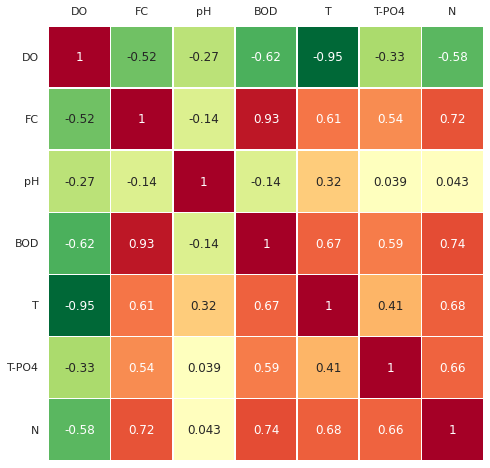

In [17]:
dfc = df - df.mean() #centered data

ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

##Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

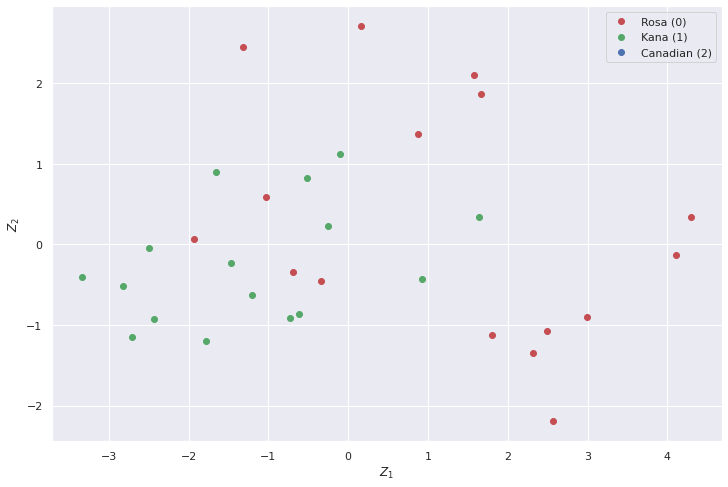

In [18]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)


idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

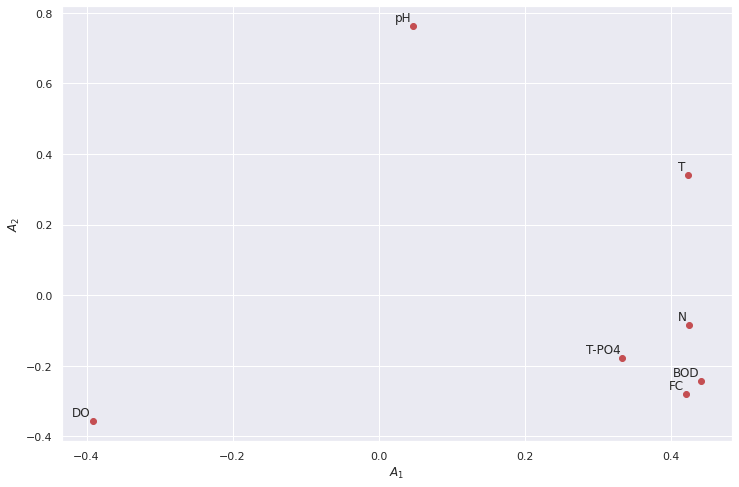

In [19]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, Y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, Y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: class, dtype: int64


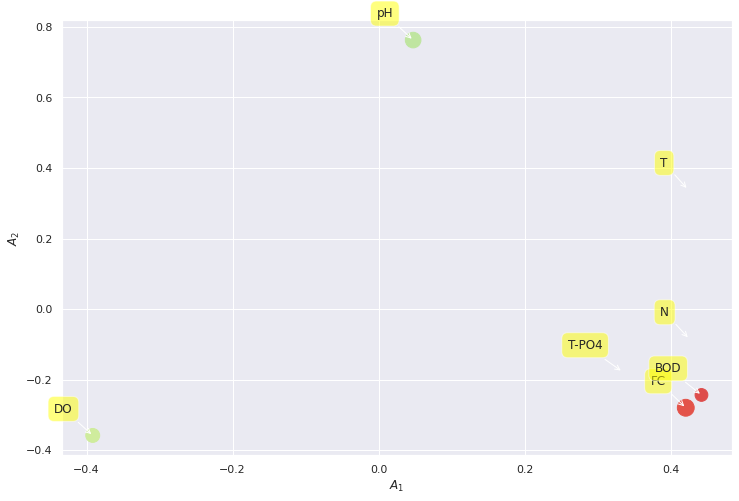

In [20]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, Y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, Y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
print(y)

### **Scree plot**

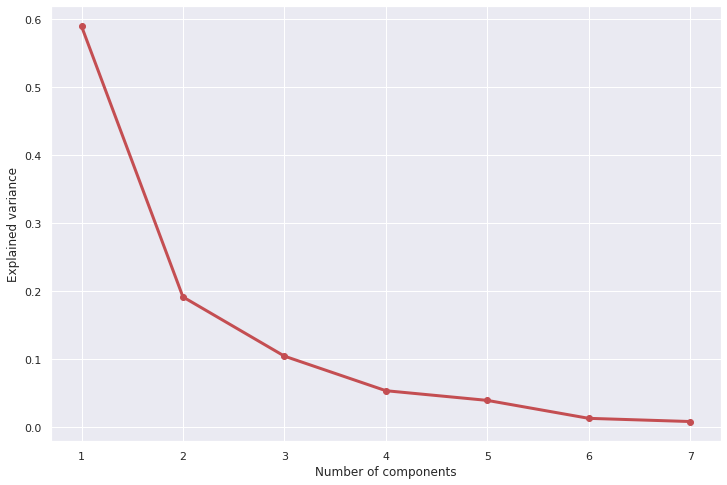

In [21]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

##Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

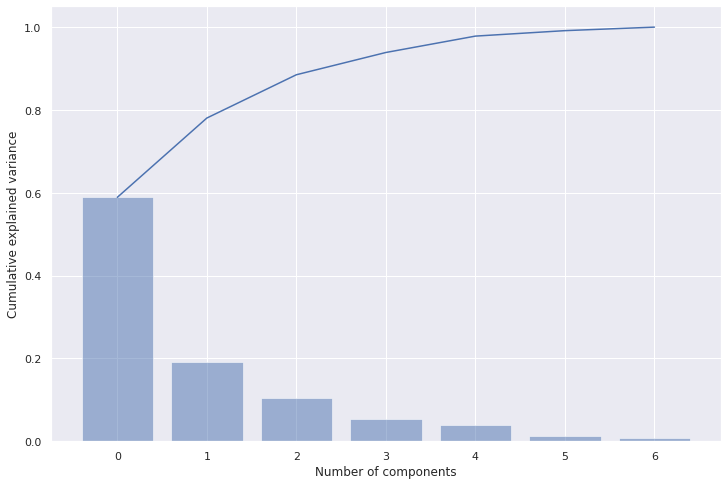

In [22]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [23]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (58.9%)',
 '1': 'PC 2 (19.1%)',
 '2': 'PC 3 (10.5%)',
 '3': 'PC 4 (5.4%)',
 '4': 'PC 5 (4.0%)',
 '5': 'PC 6 (1.3%)',
 '6': 'PC 7 (0.8%)'}

##Biplot

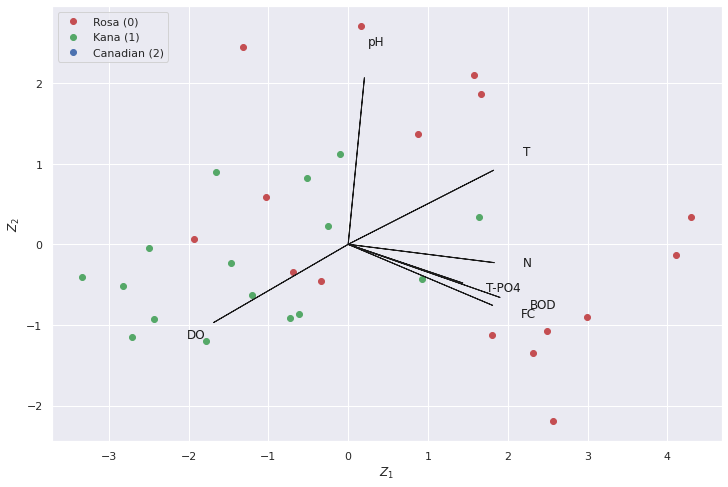

In [24]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

##Using PCA library

In [25]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=18dcca6e416b8edf8f65d9e5a08f6d44f30a578dc3ba1bd9c242b5afa806f376
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [26]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [27]:
print(out['topfeat'])

    PC feature   loading  type
0  PC1     BOD  0.442238  best
1  PC2      pH  0.762430  best
2  PC3   T-PO4  0.740236  best
3  PC4      FC  0.567136  best
4  PC5       N  0.857534  best
5  PC1      DO -0.391601  weak
6  PC1       T  0.423577  weak


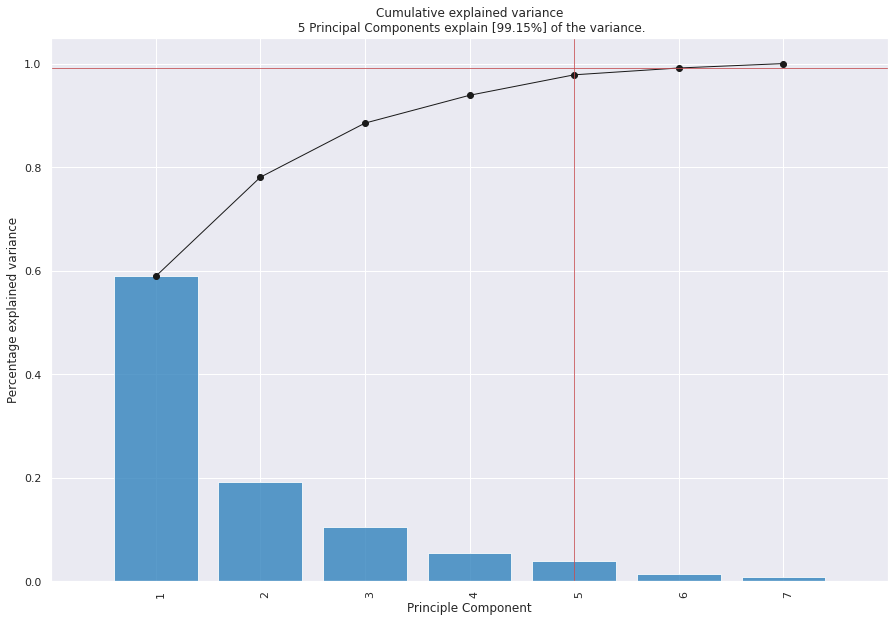

<Figure size 864x576 with 0 Axes>

In [28]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


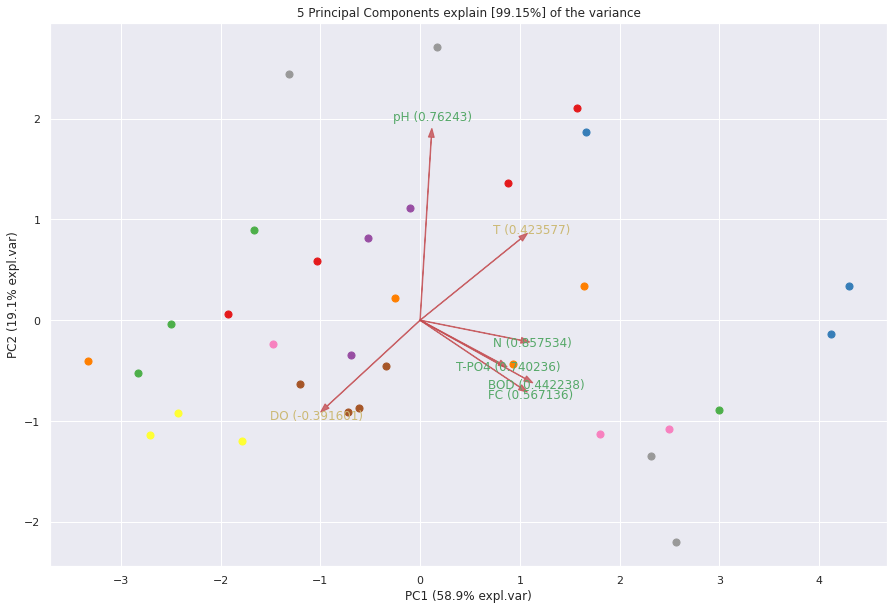

In [29]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


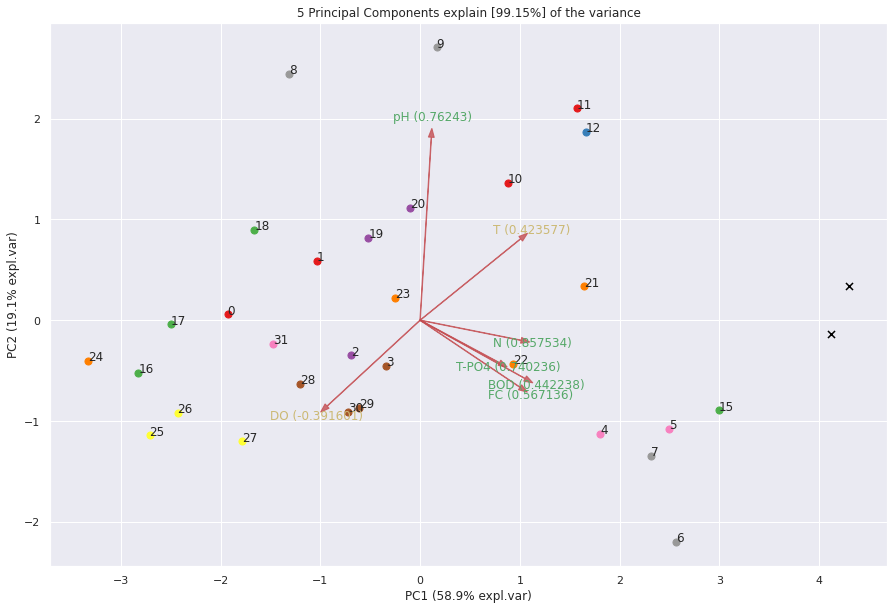

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff187e66190>)

In [30]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


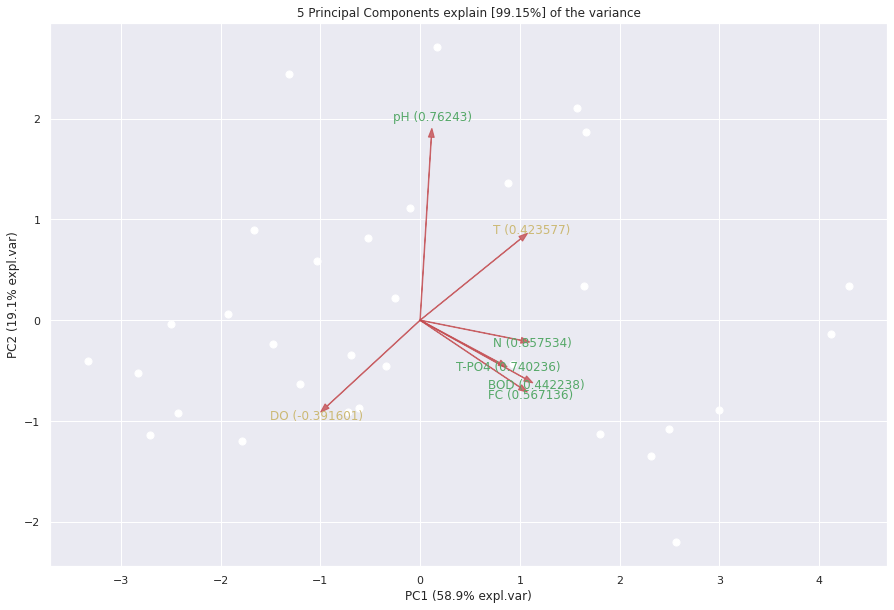

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff18f331390>)

In [31]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


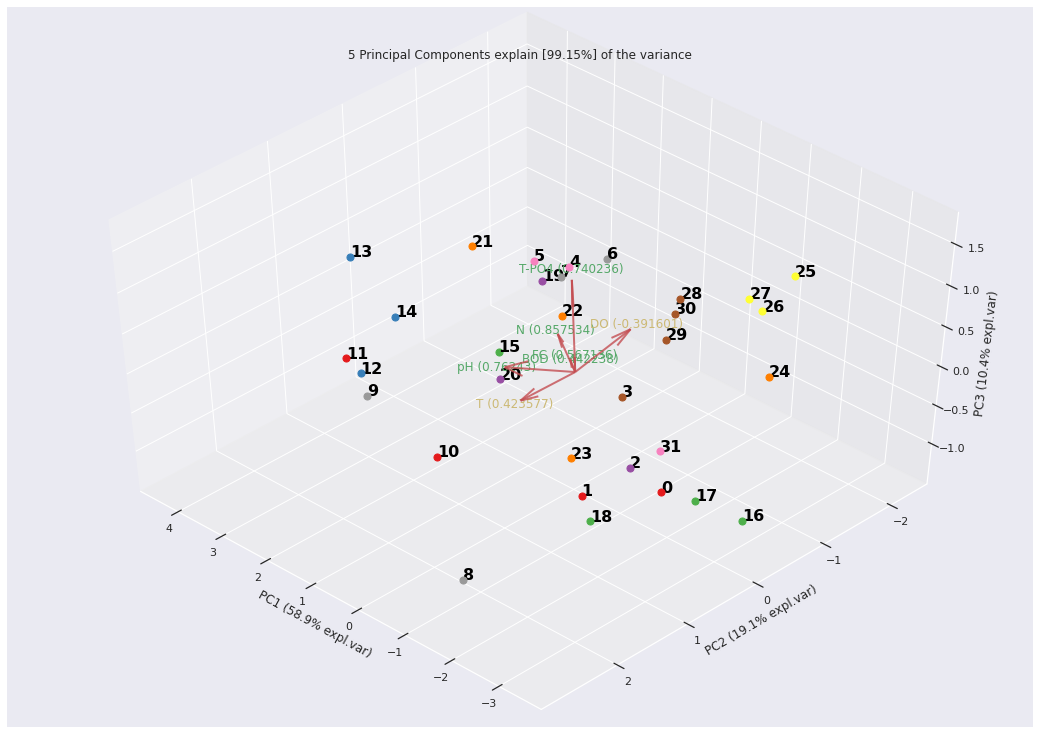

In [32]:
ax = model.biplot3d(legend=False)

##Principal Components

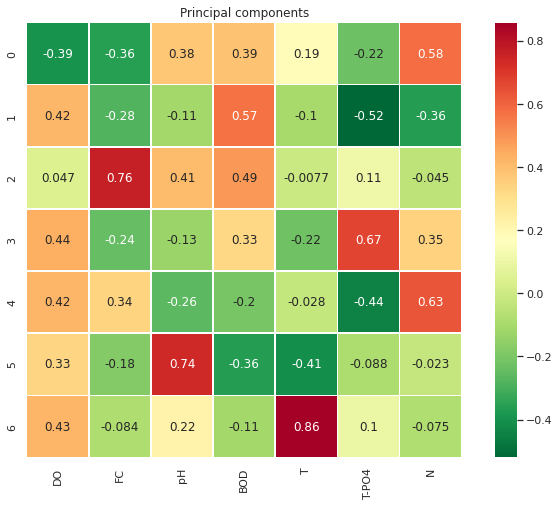

PC1:[-0.39160097  0.42073801  0.04727702  0.4422376   0.42357674  0.33394414
  0.42530349]
PC2:[-0.35779609 -0.27936985  0.76243029 -0.24307933  0.33927408 -0.17725901
 -0.08378111]


In [33]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

## Hotelling's T2 test

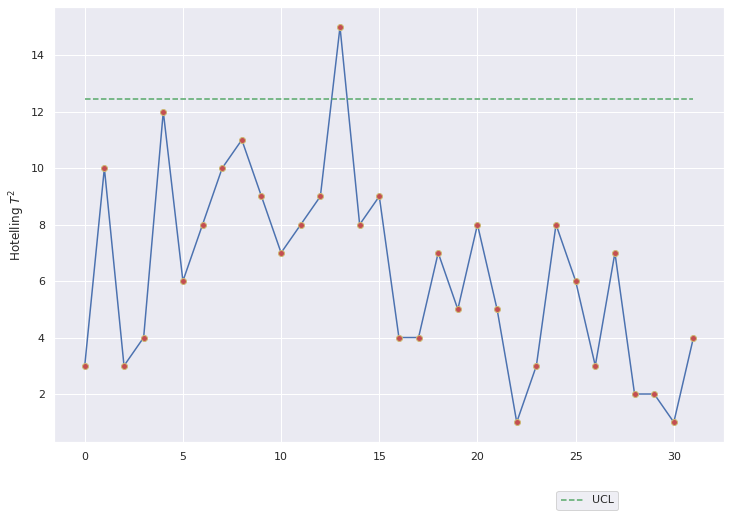

In [34]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

### **Control Charts for Principal Components**

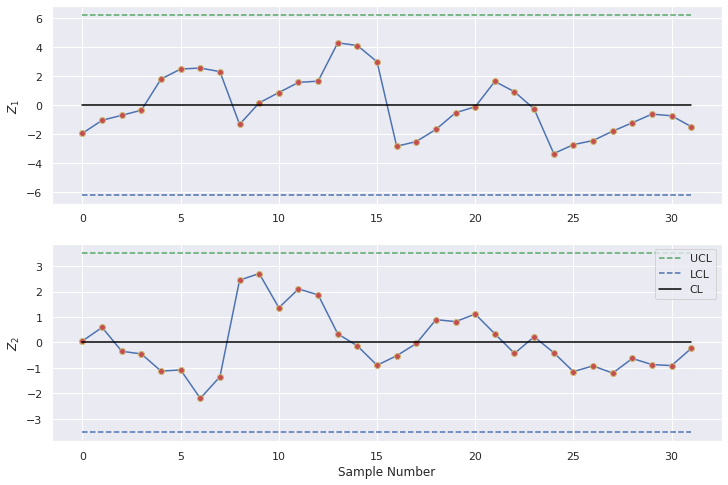

In [35]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [36]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[]


## **Multi-Class Classification**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 22
Test Dataset Size: 10


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.667     0.800     0.727         5
           1      0.750     0.600     0.667         5

    accuracy                          0.700        10
   macro avg      0.708     0.700     0.697        10
weighted avg      0.708     0.700     0.697        10



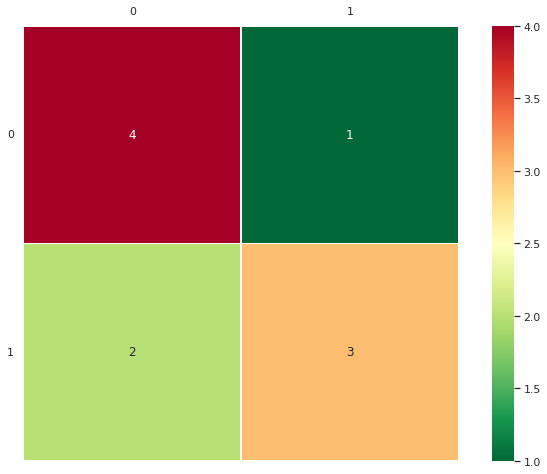

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.800     0.800     0.800         5
           1      0.800     0.800     0.800         5

    accuracy                          0.800        10
   macro avg      0.800     0.800     0.800        10
weighted avg      0.800     0.800     0.800        10



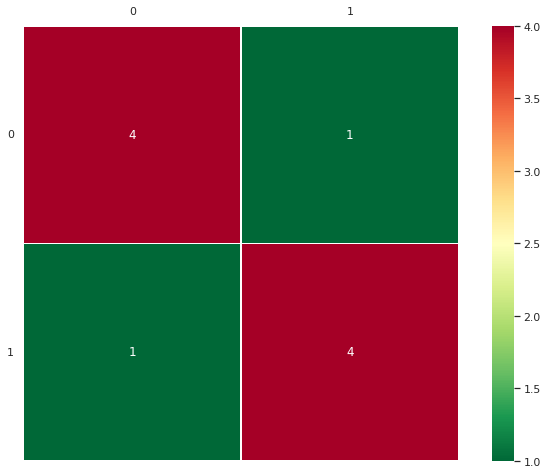

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.667     0.800     0.727         5
           1      0.750     0.600     0.667         5

    accuracy                          0.700        10
   macro avg      0.708     0.700     0.697        10
weighted avg      0.708     0.700     0.697        10



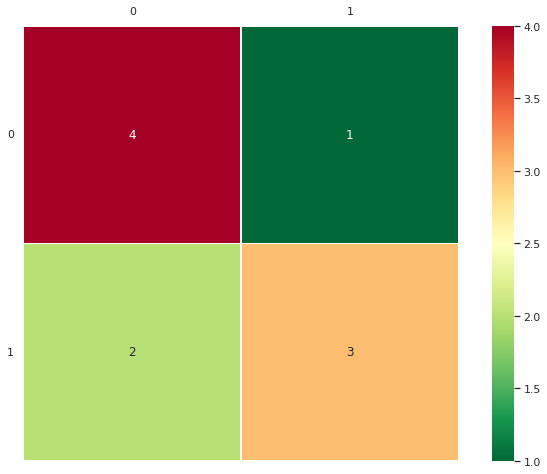

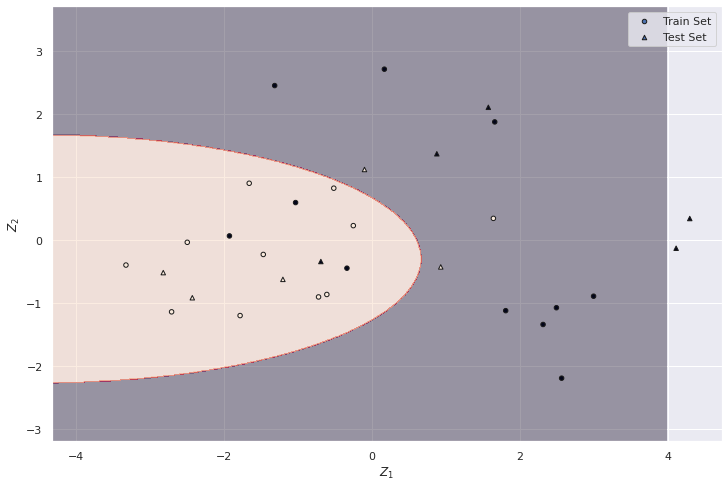

(array([1, 3, 8]),)


In [38]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 729, in kneighbors
    " but n_samples = %d, n_neighbors = %d

Grid Search Results:
k_full_data: {'n_neighbors': 8}
k_Z: {'n_neighbors': 8}
k_Z12: {'n_neighbors': 8}
                                    0         1         2         3         4
knn_full_data fit_time       0.003504  0.003296  0.003482  0.003585  0.002619
knn_Z  fit_time              0.001240  0.000896  0.001366  0.001327  0.001446
knn_Z12 fit_time             0.001173  0.001083  0.001604  0.001153  0.001336
knn_full_data test_f1_macro  0.761905  0.800000  0.733333  0.333333  0.733333
knn_Z  test_f1_macro         0.761905  0.800000  0.733333  0.333333  0.733333
knn_Z12 test_f1_macro        1.000000  0.800000  0.733333  0.333333  0.733333

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.800     0.800     0.800         5
           1      0.800     0.800     0.800         5

    accuracy                          0.800        10
   macro avg      0.800     0.800     0.800        10
weighted avg      0.800     0.800   

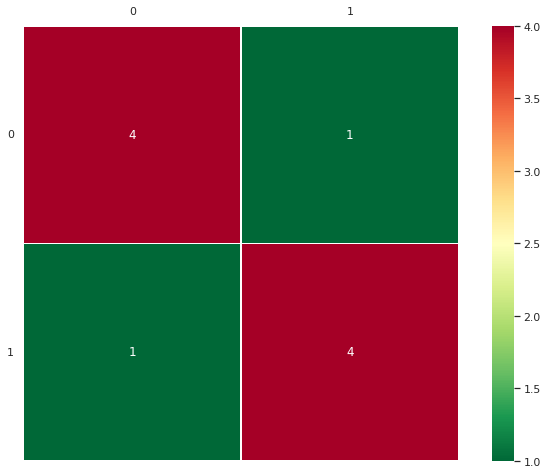

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.800     0.800     0.800         5
           1      0.800     0.800     0.800         5

    accuracy                          0.800        10
   macro avg      0.800     0.800     0.800        10
weighted avg      0.800     0.800     0.800        10



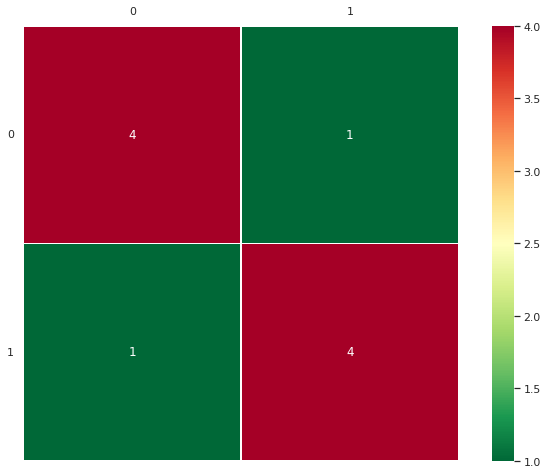

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.667     0.800     0.727         5
           1      0.750     0.600     0.667         5

    accuracy                          0.700        10
   macro avg      0.708     0.700     0.697        10
weighted avg      0.708     0.700     0.697        10



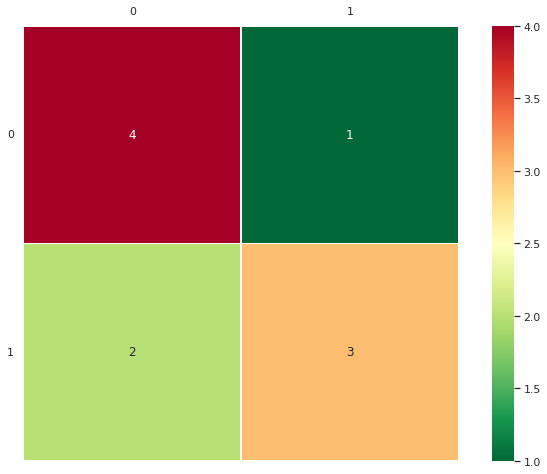

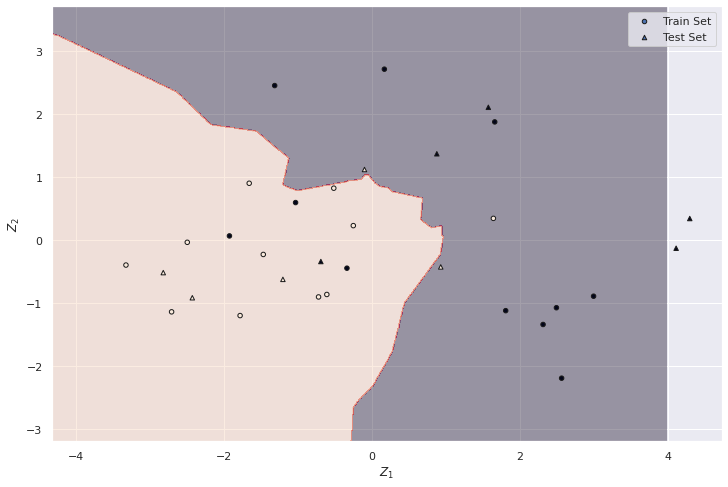

In [39]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)


Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.003509  0.003694  0.003312  0.003037  0.003309
dt_Z  fit_time              0.001270  0.001327  0.001241  0.001241  0.001258
dt_Z12 fit_time             0.001365  0.001689  0.003768  0.001606  0.001431
dt_full_data test_f1_macro  0.800000  0.761905  1.000000  0.333333  1.000000
dt_Z  test_f1_macro         1.000000  0.761905  0.200000  0.200000  0.000000
dt_Z12 test_f1_macro        1.000000  0.583333  0.733333  0.200000  0.733333

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.800     0.889         5
           1      0.833     1.000     0.909         5

    accuracy                          0.900        10
   macro avg      0.917     0.900     0.899        10
weighted avg      0.917     0.900    

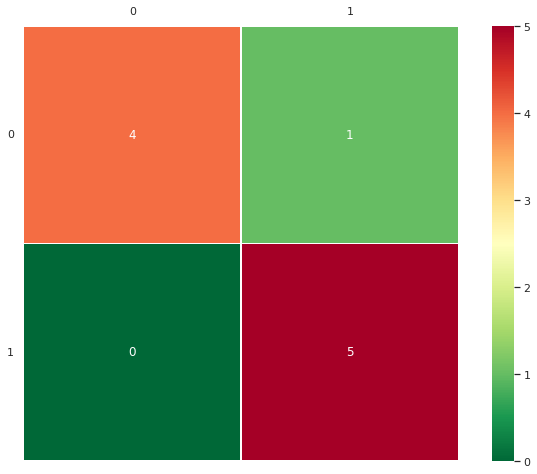

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.400     0.571         5
           1      0.625     1.000     0.769         5

    accuracy                          0.700        10
   macro avg      0.812     0.700     0.670        10
weighted avg      0.812     0.700     0.670        10



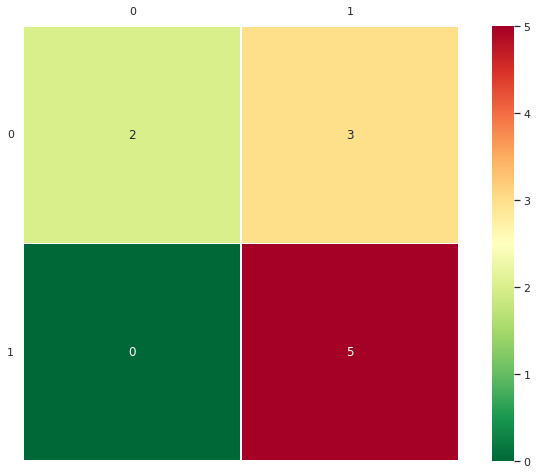

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.600     0.750         5
           1      0.714     1.000     0.833         5

    accuracy                          0.800        10
   macro avg      0.857     0.800     0.792        10
weighted avg      0.857     0.800     0.792        10



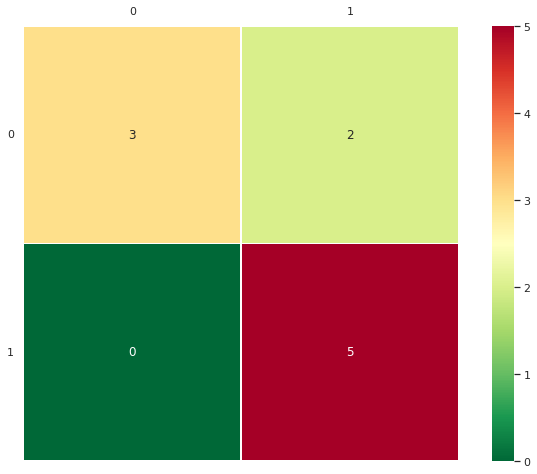

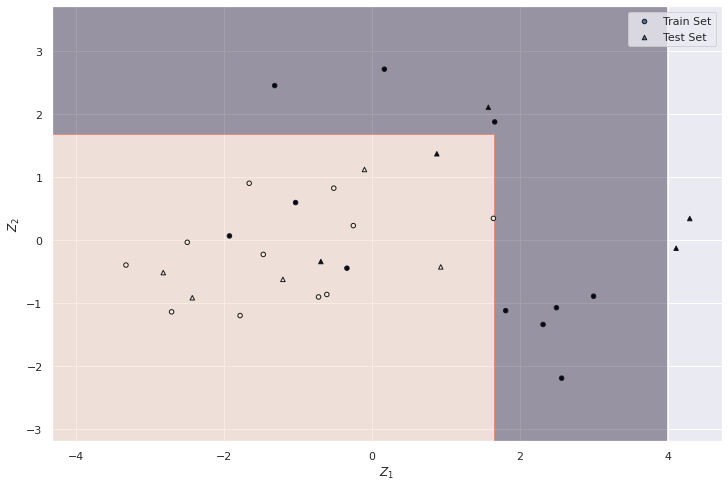

In [40]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


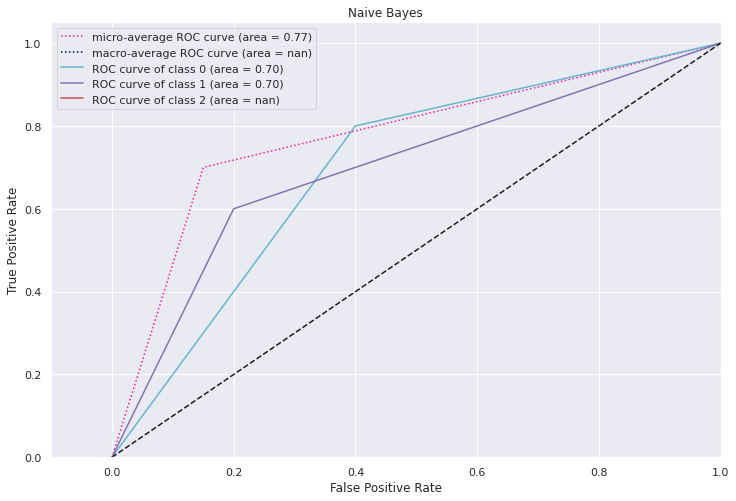

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


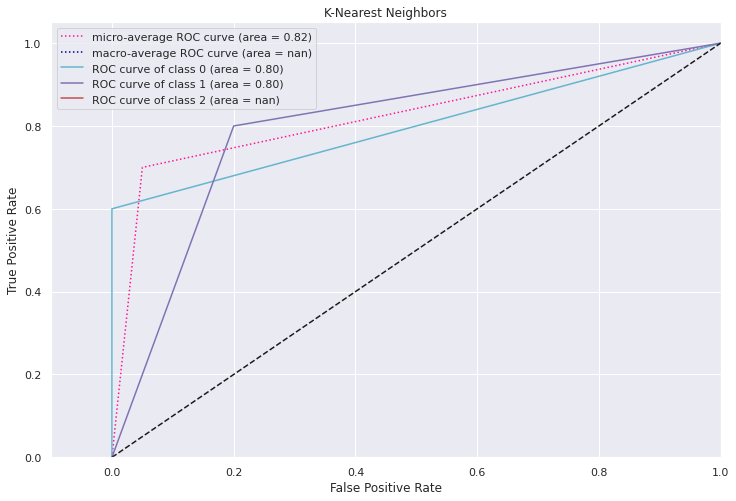

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


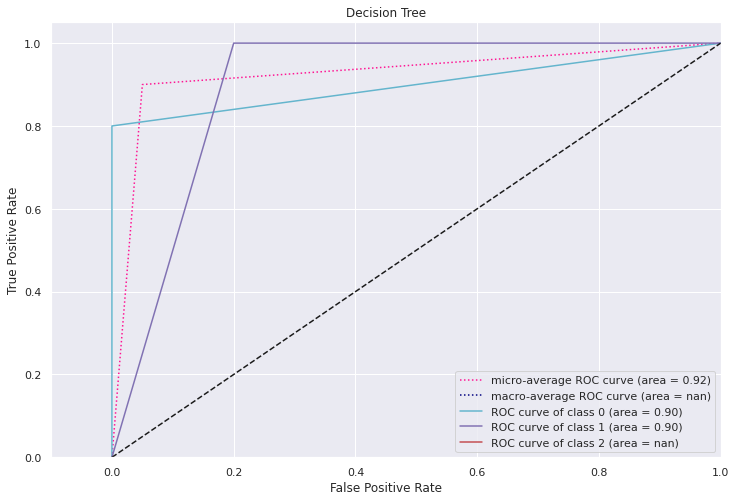

DATASET: Z


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


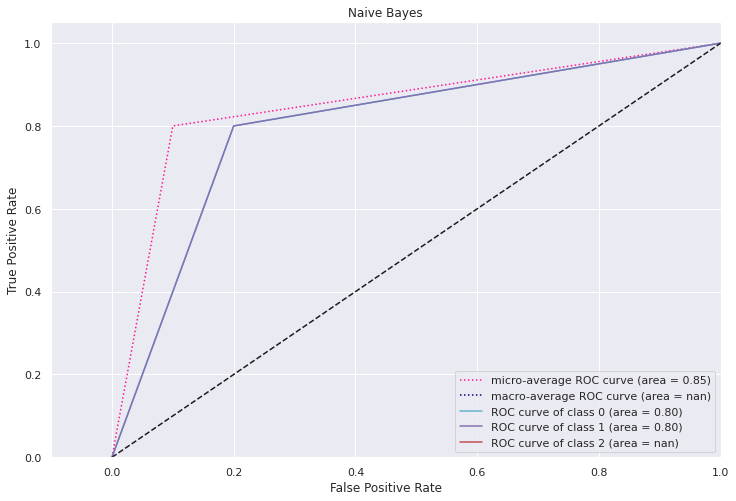

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


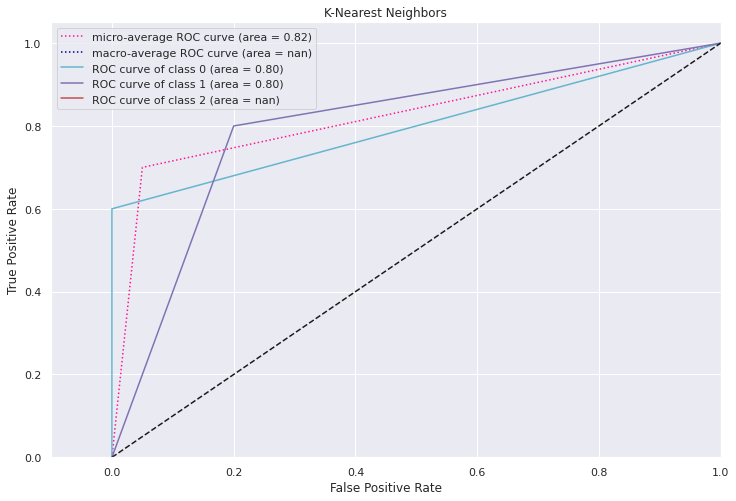

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


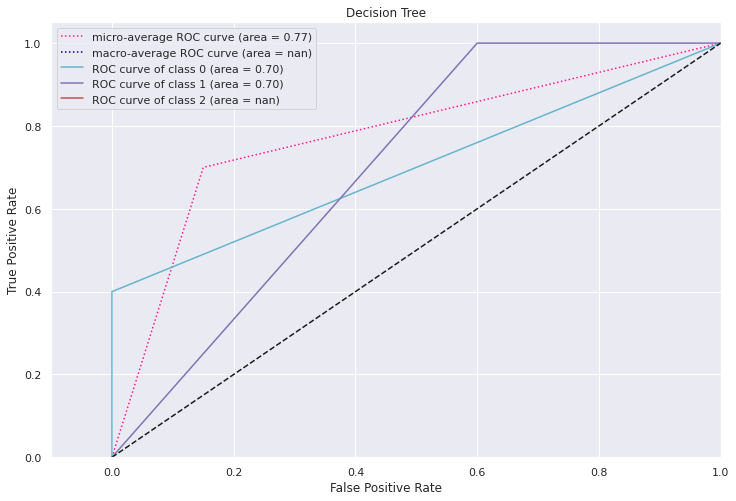

DATASET: Z12


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


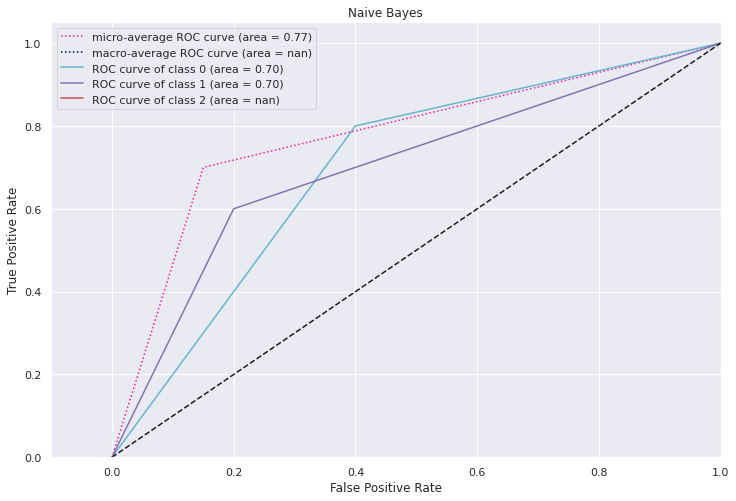

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


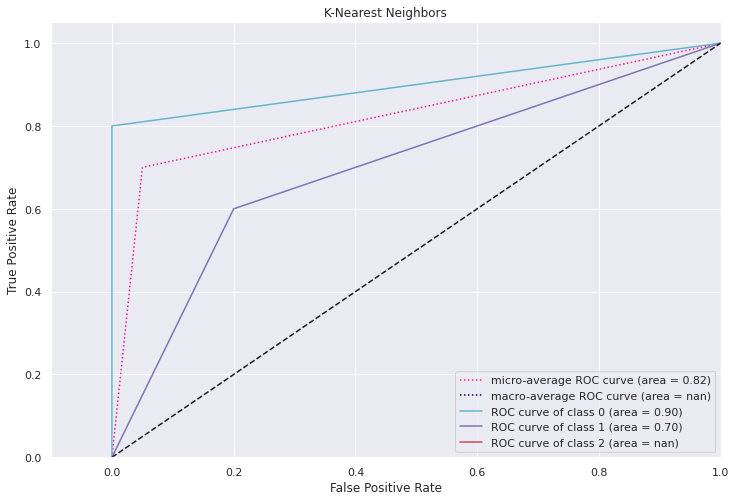

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


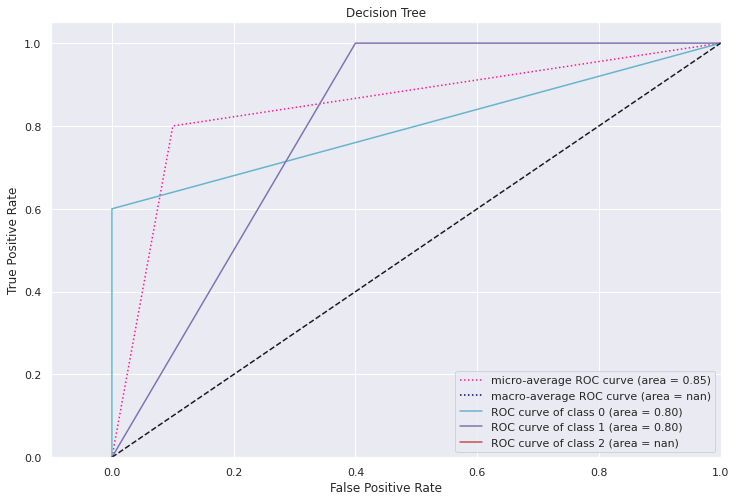

In [41]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

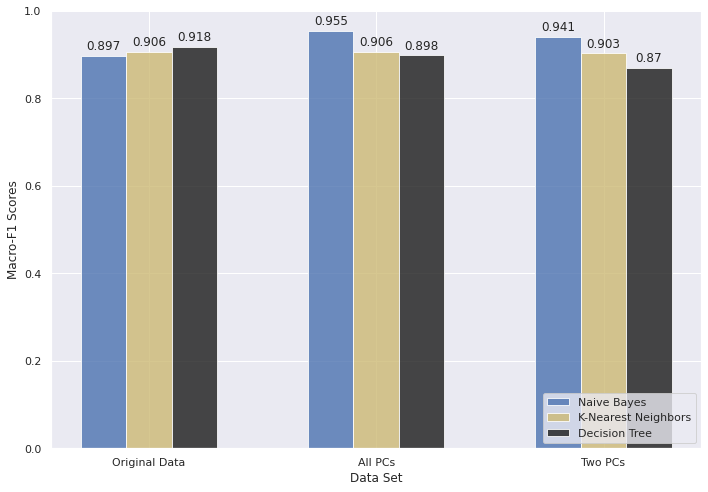

In [42]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()